# Import library

In [592]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [593]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--",'n','N','No tv','None','.']
df = pd.read_csv('COVID-19-Survey-Student.csv' ,na_values = missing_value_formats)


In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 17 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Age of Subject                                                                      1182 non-null   int64  
 1   Time spent on Online Class                                                          1182 non-null   float64
 2   Rating of Online Class experience                                                   1158 non-null   object 
 3   Medium for online class                                                             1131 non-null   object 
 4   Time spent on self study                                                            1182 non-null   float64
 5   Time spent on fitness                                                               1182 non-null

In [595]:
df.head(20)

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
5,21,0.0,Very poor,Smartphone,6.0,0.0,5.0,1.0,Youtube,0,1,Decreased,YES,Coding and studying for exams,NO,YES,School/college
6,19,2.0,Very poor,Smartphone,2.0,1.0,5.0,4.0,Instagram,0,3,Increased,NO,Watching web series,NO,YES,"Friends , relatives"
7,19,2.0,Very poor,Tablet,1.0,1.0,10.0,5.0,Instagram,0,3,Increased,YES,Scrolling through social media,NO,YES,Eating outside
8,21,3.0,Very poor,Laptop/Desktop,4.0,1.0,8.0,2.0,Whatsapp,1,3,Increased,NO,Online surfing,NO,NO,"Friends , relatives"
9,20,0.0,Very poor,Laptop/Desktop,1.0,0.5,8.0,5.0,Instagram,3,3,Decreased,YES,live stream watching,NO,NO,School/college


# Value Replace 


In [596]:

df['Do you find yourself more connected with your family, close friends , relatives  ?'].replace({'YES':1,'NO':0}, inplace= True)

In [597]:
df['Health issue during lockdown'].replace({'YES':1,'NO':0}, inplace= True)

In [598]:
df['Health issue during lockdown'].value_counts()

0    1021
1     161
Name: Health issue during lockdown, dtype: int64

In [599]:
df['Time utilized'].replace({'YES':1,'NO':0}, inplace= True)

# Missing value handling
 

In [600]:
df.isnull().sum()

Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                        17
Time spent on TV                                                                      11
Number of meals per day                                                                0
Change in your weight

In [601]:
df['Health issue during lockdown'].value_counts()

0    1021
1     161
Name: Health issue during lockdown, dtype: int64

# Nan value replace

In [602]:
df['Rating of Online Class experience']= df['Rating of Online Class experience'].fillna('Very poor')
df['Medium for online class']= df['Medium for online class'].fillna('Laptop/Desktop')
df['Prefered social media platform']= df['Prefered social media platform'].fillna('Instagram')
df['Time spent on TV']= df['Time spent on TV'].fillna(0)
df['What you miss the most']= df['What you miss the most'].fillna('School/college ')

In [603]:
df.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day,Health issue during lockdown,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?"
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.911591,0.765821,7.871235,2.365694,2.917936,0.136210,0.485618,0.703046
std,5.516467,2.101756,2.140590,0.724451,1.615762,1.767336,0.828698,0.343156,0.500005,0.457110
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000,0.000000,0.000000,1.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,3.000000,0.000000,1.000000,1.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000,1.000000,1.000000,1.000000


In [604]:
df.isnull().sum()

Age of Subject                                                                        0
Time spent on Online Class                                                            0
Rating of Online Class experience                                                     0
Medium for online class                                                               0
Time spent on self study                                                              0
Time spent on fitness                                                                 0
Time spent on sleep                                                                   0
Time spent on social media                                                            0
Prefered social media platform                                                        0
Time spent on TV                                                                      0
Number of meals per day                                                               0
Change in your weight           

In [605]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df

,Rating of Online Class experience,Medium for online class,Prefered social media platform,Time spent on TV,Change in your weight,Stress busters,What you miss the most
0,Good,Laptop/Desktop,Linkedin,1,Increased,Cooking,School/college
1,Excellent,Smartphone,Youtube,0,Decreased,Scrolling through social media,Roaming around freely
2,Very poor,Laptop/Desktop,Linkedin,0,Remain Constant,Listening to music,Travelling
3,Very poor,Smartphone,Instagram,0,Decreased,Watching web series,"Friends , relatives"
4,Good,Laptop/Desktop,Instagram,1,Remain Constant,Social Media,Travelling
...,...,...,...,...,...,...,...
1177,Good,Smartphone,Instagram,2,Decreased,Dancing,Travelling
1178,Average,Smartphone,Whatsapp,1,Remain Constant,Listening to music,"Friends , relatives"
1179,Average,Smartphone,Youtube,2,Decreased,Online gaming,School/college
1180,Excellent,Laptop/Desktop,Youtube,1,Remain Constant,Reading books,School/college


# Label Encoding 

In [606]:
label_encoder =  preprocessing.LabelEncoder()
df['Rating of Online Class experience'] = label_encoder.fit_transform(df['Rating of Online Class experience'])
df['Medium for online class'] = label_encoder.fit_transform(df['Medium for online class'])
df['Prefered social media platform'] = label_encoder.fit_transform(df['Prefered social media platform'])
df['Time spent on TV'] = label_encoder.fit_transform(df['Time spent on TV'].astype(str))
df['Change in your weight'] = label_encoder.fit_transform(df['Change in your weight'])
df['Stress busters'] = label_encoder.fit_transform(df['Stress busters'])
df['What you miss the most'] = label_encoder.fit_transform(df['What you miss the most'])

(array([ 21.,  71., 108., 227.,   8.,   6.,  16., 531., 187.,   7.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

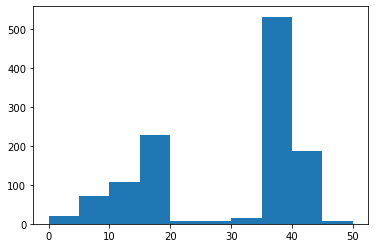

In [607]:
plt.hist(df['What you miss the most'])

In [608]:
df

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,21,2.0,2,1,4.0,0.0,7.0,3.0,3,9,4,1,0,9,1,1,39
1,21,0.0,1,2,0.0,2.0,10.0,3.0,14,1,3,0,0,48,1,0,36
2,20,7.0,4,1,3.0,0.0,6.0,2.0,3,1,3,2,0,29,0,1,44
3,20,3.0,4,2,2.0,1.0,6.0,5.0,2,1,3,0,0,65,0,0,15
4,21,3.0,2,1,3.0,1.0,8.0,3.0,2,9,4,2,0,54,0,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,12,3.0,2,2,4.0,1.0,8.0,1.0,2,12,3,0,0,12,1,1,44
1178,14,6.0,0,2,4.0,1.0,9.0,1.0,13,9,4,2,0,29,1,1,15
1179,13,4.0,0,2,0.0,0.5,8.0,3.0,14,12,4,0,0,36,0,1,39
1180,14,5.0,1,1,3.5,1.0,8.0,0.5,14,9,4,2,0,45,1,1,39


# Mental Health Status

In [609]:
x = df.drop(['Health issue during lockdown'],axis = 1)
y = df['Health issue during lockdown']

In [610]:
x

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,21,2.0,2,1,4.0,0.0,7.0,3.0,3,9,4,1,9,1,1,39
1,21,0.0,1,2,0.0,2.0,10.0,3.0,14,1,3,0,48,1,0,36
2,20,7.0,4,1,3.0,0.0,6.0,2.0,3,1,3,2,29,0,1,44
3,20,3.0,4,2,2.0,1.0,6.0,5.0,2,1,3,0,65,0,0,15
4,21,3.0,2,1,3.0,1.0,8.0,3.0,2,9,4,2,54,0,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,12,3.0,2,2,4.0,1.0,8.0,1.0,2,12,3,0,12,1,1,44
1178,14,6.0,0,2,4.0,1.0,9.0,1.0,13,9,4,2,29,1,1,15
1179,13,4.0,0,2,0.0,0.5,8.0,3.0,14,12,4,0,36,0,1,39
1180,14,5.0,1,1,3.5,1.0,8.0,0.5,14,9,4,2,45,1,1,39


In [611]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1177    0
1178    0
1179    0
1180    0
1181    0
Name: Health issue during lockdown, Length: 1182, dtype: int64

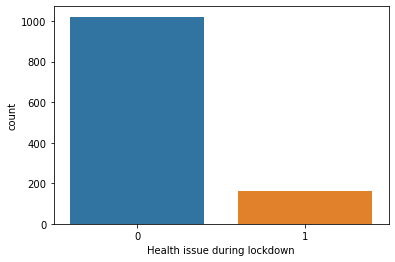

In [612]:
sns.countplot(x='Health issue during lockdown',data=df)
plt.show()

# Hyper Parameter tuning

In [613]:
from sklearn import preprocessing
xp = preprocessing.scale(x) 
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(gamma='auto'),{
   'C':[1,10,20],
   'kernel':['rbf','linear']
},cv=10,return_train_score=False)
clf.fit(xp,y)
clf.best_score_

0.8637943312918388

In [614]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [615]:
from sklearn.model_selection import RandomizedSearchCV
xr = preprocessing.scale(x)
rs=RandomizedSearchCV(svm.SVC(gamma='auto'),{
   'C':[1,10,20],
   'kernel':['rbf','linear']
},cv=10,return_train_score=False,n_iter=2)
rs.fit(xr,y)
rs.best_score_

0.8637943312918388

In [616]:
model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,10,20],
#             'kernel': ['rbf','linear']
#         }  
#     },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [617]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'],scoring='accuracy', n_jobs=1, cv=10, refit=True)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dt = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dt

,model,best_score,best_params
0,random_forest,0.864620,{'n_estimators': 10}
1,logistic_regression,0.865482,{'C': 1}


# Feature Importance

In [618]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [619]:
model.feature_importances_

array([0.07903614, 0.07774398, 0.04892429, 0.04911084, 0.0786775 ,
       0.05367984, 0.06966297, 0.07646967, 0.06480049, 0.07147324,
       0.06457619, 0.05623615, 0.08454885, 0.03196118, 0.02506235,
       0.06803634])

In [620]:
top=pd.Series(model.feature_importances_,x.columns)
top

Age of Subject                                                                        0.079036
Time spent on Online Class                                                            0.077744
Rating of Online Class experience                                                     0.048924
Medium for online class                                                               0.049111
Time spent on self study                                                              0.078677
Time spent on fitness                                                                 0.053680
Time spent on sleep                                                                   0.069663
Time spent on social media                                                            0.076470
Prefered social media platform                                                        0.064800
Time spent on TV                                                                      0.071473
Number of meals per day                           

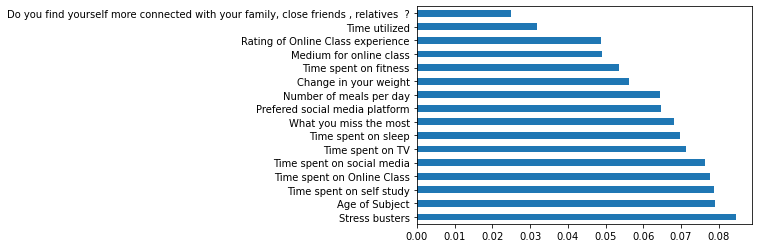

In [621]:
top.nlargest(18).plot(kind='barh')

In [622]:
xf = df.drop(['Do you find yourself more connected with your family, close friends , relatives  ?','Health issue during lockdown'],axis = 1)
# df

In [623]:
seed = 4
xtrainf,xtestf,ytrainf,ytestf = train_test_split(xf,y,test_size=.3,random_state=4 )

In [624]:
xf

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Stress busters,Time utilized,What you miss the most
0,21,2.0,2,1,4.0,0.0,7.0,3.0,3,9,4,1,9,1,39
1,21,0.0,1,2,0.0,2.0,10.0,3.0,14,1,3,0,48,1,36
2,20,7.0,4,1,3.0,0.0,6.0,2.0,3,1,3,2,29,0,44
3,20,3.0,4,2,2.0,1.0,6.0,5.0,2,1,3,0,65,0,15
4,21,3.0,2,1,3.0,1.0,8.0,3.0,2,9,4,2,54,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,12,3.0,2,2,4.0,1.0,8.0,1.0,2,12,3,0,12,1,44
1178,14,6.0,0,2,4.0,1.0,9.0,1.0,13,9,4,2,29,1,15
1179,13,4.0,0,2,0.0,0.5,8.0,3.0,14,12,4,0,36,0,39
1180,14,5.0,1,1,3.5,1.0,8.0,0.5,14,9,4,2,45,1,39


# naive_bayes

In [625]:
from sklearn.naive_bayes import BernoulliNB
gnb=BernoulliNB()
gnb.fit(xtrainf,ytrainf)
gnb.score(xtestf,ytestf)

y_pred=gnb.predict(xtestf)
#confusion_matrix
cfm = confusion_matrix(ytestf, y_pred)    
print("confusion_matrix:")
print(cfm)
print(classification_report(ytestf, y_pred))
# print("\n")

confusion_matrix:
[[302   1]
 [ 51   1]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       303
           1       0.50      0.02      0.04        52

    accuracy                           0.85       355
   macro avg       0.68      0.51      0.48       355
weighted avg       0.80      0.85      0.79       355



In [626]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrainf,ytrainf)
gnb.score(xtestf,ytestf)

y_pred=gnb.predict(xtestf)
#confusion_matrix
cfm = confusion_matrix(ytestf, y_pred)    
print("confusion_matrix:")
print(cfm)
print(classification_report(ytestf, y_pred))

confusion_matrix:
[[296   7]
 [ 47   5]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       303
           1       0.42      0.10      0.16        52

    accuracy                           0.85       355
   macro avg       0.64      0.54      0.54       355
weighted avg       0.80      0.85      0.81       355



In [627]:
seed = 4
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=4 )

# Pearson Correlation

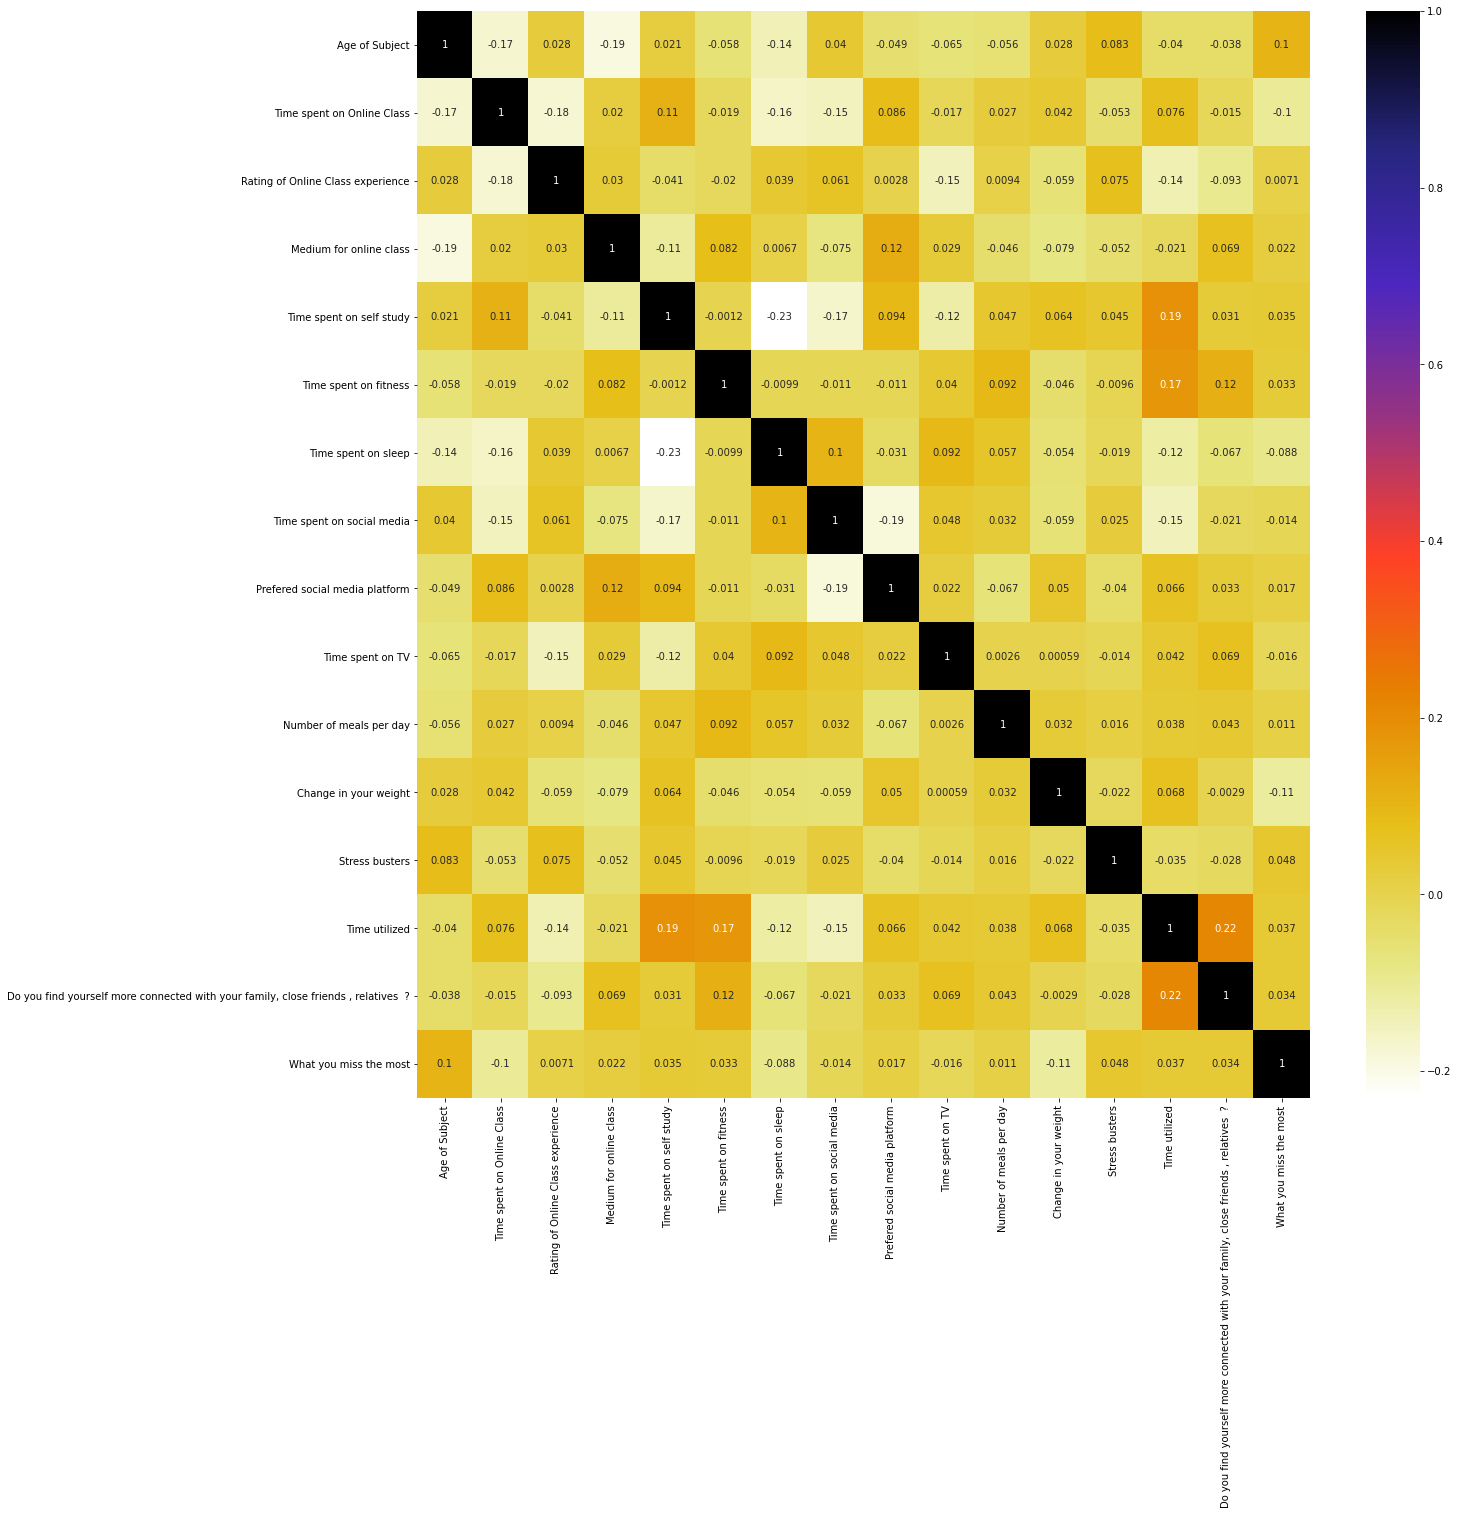

In [628]:
plt.figure(figsize=(20,20))
cor=xtrain.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

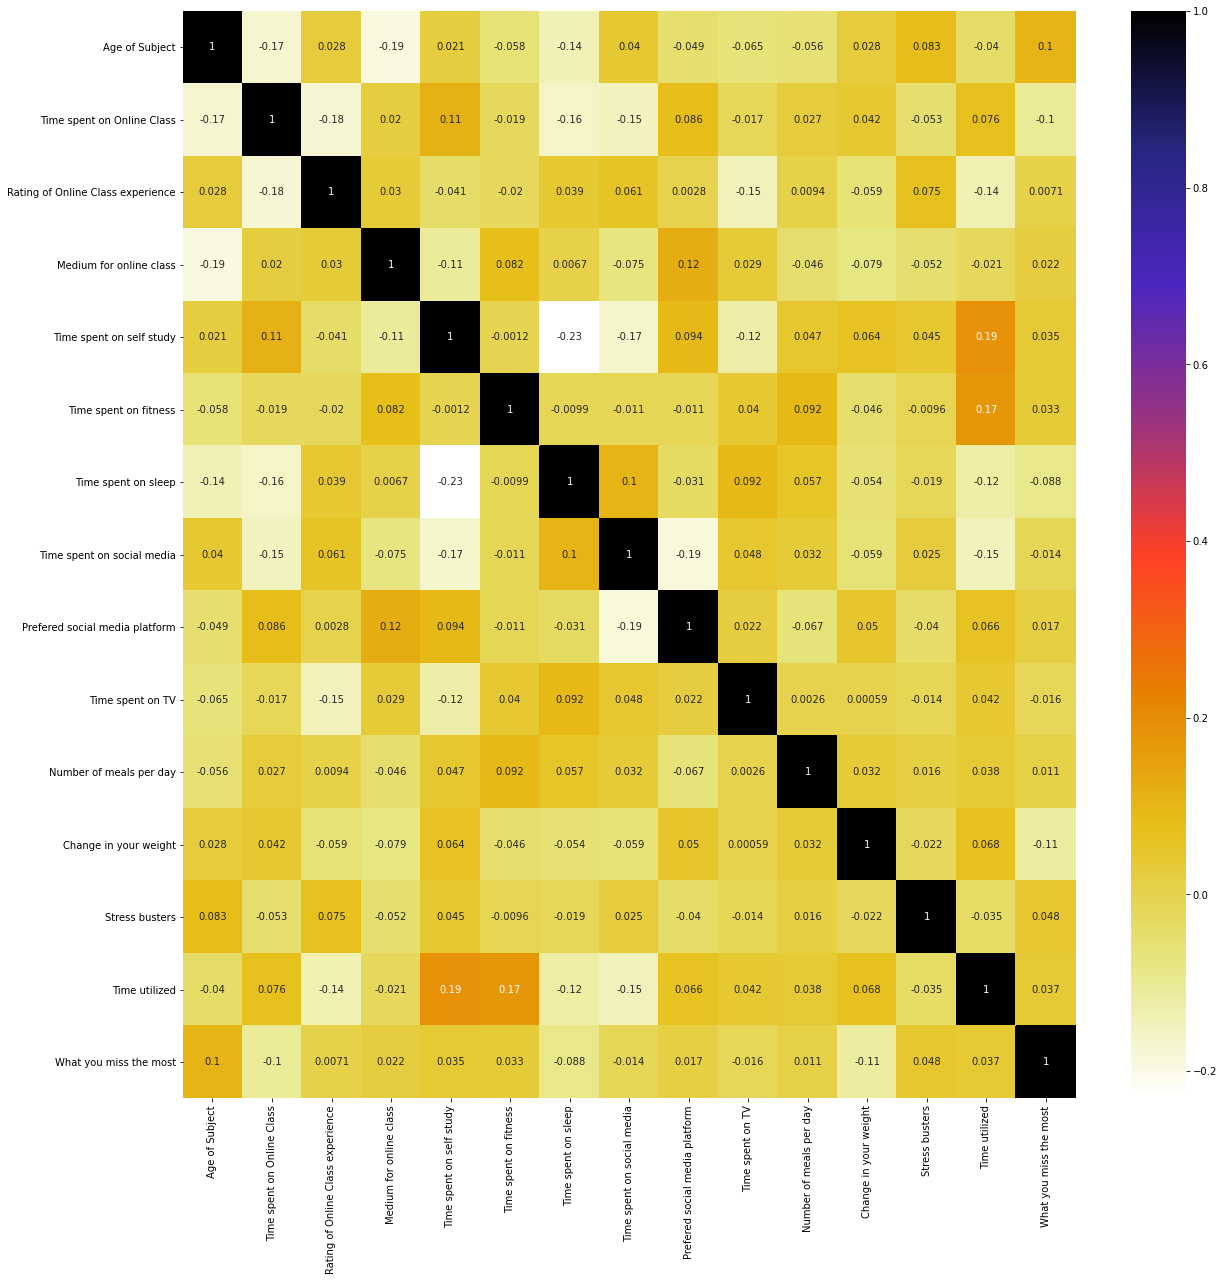

In [629]:
plt.figure(figsize=(20,20))
cor=xtrainf.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [630]:
def correlation(dataset,threshold):
    col_cor=set()
    cor_matrix=dataset.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if (cor_matrix.iloc[i,j])>threshold:
                colname=cor_matrix[i]
                col_cor.add(colname)
    return col_cor

In [631]:
corfeature=correlation(xtrain,.7)
len(set(corfeature))

0

In [632]:
xtrain

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
125,20,5.0,0,2,4.0,1.0,7.0,2.0,13,9,3,1,33,1,1,39
580,20,4.0,4,2,3.0,0.0,8.0,1.0,1,1,1,1,48,0,1,27
534,44,3.0,0,2,4.0,0.0,6.0,1.0,1,9,2,2,45,1,1,36
741,22,0.0,4,1,0.0,1.0,5.0,4.0,2,1,2,0,65,0,1,44
895,33,3.0,0,2,1.0,0.0,6.0,1.0,13,16,2,0,52,0,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,23,5.0,1,2,1.0,1.0,9.0,2.0,13,1,4,0,36,1,1,14
709,17,4.0,4,2,1.0,0.0,6.0,2.0,2,1,3,1,29,0,0,15
439,21,0.0,4,1,2.0,1.0,7.0,2.0,13,20,3,1,65,0,0,15
174,20,5.0,0,1,4.0,0.0,10.0,2.0,3,16,3,0,51,1,1,36


# Ensemble hard_voting

In [633]:
log_clf =LogisticRegression(random_state=42)
rnd_clf=RandomForestClassifier(random_state=42)
svm_clf=SVC(random_state=42)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(xtrain,ytrain)
for clf in(log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(xtrain,ytrain)
    y_pred=clf.predict(xtest)
    predictions_train = clf.predict(xtrain)
    #confusion_matrix
    cfm = confusion_matrix(ytest, y_pred)
    
    print("Training Accuracy : ", accuracy_score(ytrain,predictions_train))
    print(clf.__class__.__name__,":",accuracy_score(ytest,y_pred))
    print("confusion_matrix:")
    print(cfm)
    print(classification_report(ytest, y_pred))
    print("\n")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training Accuracy :  0.8694074969770254
LogisticRegression : 0.856338028169014
confusion_matrix:
[[302   1]
 [ 50   2]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       303
           1       0.67      0.04      0.07        52

    accuracy                           0.86       355
   macro avg       0.76      0.52      0.50       355
weighted avg       0.83      0.86      0.80       355



Training Accuracy :  1.0
RandomForestClassifier : 0.8535211267605634
confusion_matrix:
[[303   0]
 [ 52   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       303
           1       0.00      0.00      0.00        52

    accuracy                           0.85       355
   macro avg       0.43      0.50      0.46       355
weighted avg       0.73      0.85      0.79       355



Training Accuracy :  0.8681983071342201
SVC : 0.8535211267605634
confusion_matrix:
[[303   0]
 [ 52   0]]
      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

Training Accuracy :  0.8694074969770254
VotingClassifier : 0.8535211267605634
confusion_matrix:
[[303   0]
 [ 52   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       303
           1       0.00      0.00      0.00        52

    accuracy                           0.85       355
   macro avg       0.43      0.50      0.46       355
weighted avg       0.73      0.85      0.79       355





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Importance

# Ensemble hard_voting

In [634]:
log_clf =LogisticRegression(random_state=42)
rnd_clf=RandomForestClassifier(random_state=42)
svm_clf=SVC(random_state=42)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(xtrainf,ytrainf)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [635]:
for clf in(log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(xtrainf,ytrainf)
    y_pred=clf.predict(xtestf)
    predictions_train = clf.predict(xtrainf)
    print("\nTraining Accuracy : ", accuracy_score(ytrainf,predictions_train))
    print(clf.__class__.__name__,accuracy_score(ytestf,y_pred))
    #confusion_matrix
    cfm = confusion_matrix(ytestf, y_pred)    
    print("confusion_matrix:")
    print(cfm)
    print(classification_report(ytestf, y_pred))
    print("\n")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Accuracy :  0.8694074969770254
LogisticRegression 0.856338028169014
confusion_matrix:
[[302   1]
 [ 50   2]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       303
           1       0.67      0.04      0.07        52

    accuracy                           0.86       355
   macro avg       0.76      0.52      0.50       355
weighted avg       0.83      0.86      0.80       355




Training Accuracy :  1.0
RandomForestClassifier 0.856338028169014
confusion_matrix:
[[303   0]
 [ 51   1]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       303
           1       1.00      0.02      0.04        52

    accuracy                           0.86       355
   macro avg       0.93      0.51      0.48       355
weighted avg       0.88      0.86      0.79       355




Training Accuracy :  0.8681983071342201
SVC 0.8535211267605634
confusion_matrix:
[[303   0]
 [ 52   0]]
          

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Accuracy :  0.8694074969770254
VotingClassifier 0.856338028169014
confusion_matrix:
[[303   0]
 [ 51   1]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       303
           1       1.00      0.02      0.04        52

    accuracy                           0.86       355
   macro avg       0.93      0.51      0.48       355
weighted avg       0.88      0.86      0.79       355





# Ensemble soft voting

In [636]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf =LogisticRegression(random_state=42)
rnd_clf=RandomForestClassifier(random_state=42)
svm_clf=SVC(probability=True,random_state=42)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='soft')
voting_clf.fit(xtrainf,ytrainf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [637]:
for clf in(log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(xtrainf,ytrainf)
    #test_accuracy
    y_pred=clf.predict(xtestf)
    #train accuracy
    predictions_train = clf.predict(xtrainf)
    print("\nTraining Accuracy : ", accuracy_score(ytrainf,predictions_train))
    print(clf.__class__.__name__,accuracy_score(ytestf,y_pred))
    #confusion_matrix
    cfm = confusion_matrix(ytestf, y_pred)    
    print("confusion_matrix:")
    print(cfm)
    print(classification_report(ytestf, y_pred))
    print("\n")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Accuracy :  0.8694074969770254
LogisticRegression 0.856338028169014
confusion_matrix:
[[302   1]
 [ 50   2]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       303
           1       0.67      0.04      0.07        52

    accuracy                           0.86       355
   macro avg       0.76      0.52      0.50       355
weighted avg       0.83      0.86      0.80       355




Training Accuracy :  1.0
RandomForestClassifier 0.856338028169014
confusion_matrix:
[[303   0]
 [ 51   1]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       303
           1       1.00      0.02      0.04        52

    accuracy                           0.86       355
   macro avg       0.93      0.51      0.48       355
weighted avg       0.88      0.86      0.79       355




Training Accuracy :  0.8681983071342201
SVC 0.8535211267605634
confusion_matrix:
[[303   0]
 [ 52   0]]
          

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Accuracy :  0.871825876662636
VotingClassifier 0.8535211267605634
confusion_matrix:
[[303   0]
 [ 52   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       303
           1       0.00      0.00      0.00        52

    accuracy                           0.85       355
   macro avg       0.43      0.50      0.46       355
weighted avg       0.73      0.85      0.79       355





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM algorithm

In [638]:
svm_model = SVC(gamma = 'auto')
svm_model.fit(xtrain,ytrain)

SVC(gamma='auto')

In [639]:
# Accuracy on Training 
predictions_train = svm_model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = svm_model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))

#confusion_matrix
cfm = confusion_matrix(ytest, predictions_test)    
print("confusion_matrix:")
print(cfm)
print(classification_report(ytest, predictions_test))


Training Accuracy :  0.9709794437726723

Testing Accuracy :  0.8535211267605634
confusion_matrix:
[[303   0]
 [ 52   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       303
           1       0.00      0.00      0.00        52

    accuracy                           0.85       355
   macro avg       0.43      0.50      0.46       355
weighted avg       0.73      0.85      0.79       355



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Fold cross validation

In [640]:
cv_score=cross_val_score(LogisticRegression(),x,y,cv=10)
max(cv_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8739495798319328

In [641]:
cv_score=cross_val_score(RandomForestClassifier(random_state=1),x,y,cv=10)
max(cv_score)

0.8823529411764706

In [642]:
cv_score=cross_val_score(SVC(),x,y,cv=10)
max(cv_score)

0.865546218487395

In [643]:
cv_score=cross_val_score(RandomForestClassifier(random_state=1),xf,y,cv=10)
max(cv_score)

0.8823529411764706

# Random Forest

In [644]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=25, random_state=50)

In [645]:
rnf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=25, random_state=50)

In [646]:
# Accuracy on Training
from sklearn.metrics import confusion_matrix
predictions_train = rnf.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))
#confusion_matrix
confusion_matrix = confusion_matrix(ytest, predictions_test)
print(confusion_matrix)


Training Accuracy :  0.992744860943168

Testing Accuracy :  0.8647887323943662
[[303   0]
 [ 48   4]]


# Logistic Regression

In [647]:
lr_model=LogisticRegression()
lr_model.fit(xtrain,ytrain)
predictions_train = lr_model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = lr_model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.8694074969770254

Testing Accuracy :  0.856338028169014


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [648]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(xtrainf, ytrainf)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [649]:
ypred = clf_gini.predict(xtestf)
accuracy_score(ytestf,ypred)*100

84.78873239436619

# End

# Deep learning ANN

In [650]:
import tensorflow as tf
from tensorflow import keras

# scaling

In [651]:
# cols_to_scale=['Age of Subject','Time spent on Online Class','Rating of Online Class experience','Medium for online class','Time spent on self study','Time spent on fitness','Time spent on sleep','Time spent on social media','Prefered social media platform','Time spent on TV','Number of meals per day','Change in your weight','Stress busters','What you miss the most']
# scaler=MinMaxScaler()
# df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [652]:
df.sample(5)

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
411,14,5.0,0,2,1.0,1.0,7.0,1.0,13,17,2,0,0,65,0,1,15
1005,22,0.0,2,1,2.0,1.0,9.0,2.0,2,12,2,2,0,52,1,1,39
309,19,1.0,0,1,3.0,2.0,7.0,1.0,2,12,2,2,1,36,0,0,39
263,20,4.0,2,1,5.0,1.0,6.0,2.0,14,6,2,2,0,29,0,1,9
1017,36,3.0,0,1,2.0,0.0,10.0,2.0,14,1,3,1,0,65,0,0,44


In [653]:
for col in df:
    print(f'{col}:{df[col].unique()}')

Age of Subject:[21 20 19 22 31 23 17 24 18 25 16 10 14 15 34 26 59 32 30 13 29 12 43 11
 40 42 28 27  9 36  8 50 35 45  7 44 46 52 38 37 33 39]
Time spent on Online Class:[ 2.    0.    7.    3.    1.    5.    4.    8.    6.    1.5   2.5   0.1
  0.5   9.    5.5   0.75  0.7   3.5   0.8  10.    7.5 ]
Rating of Online Class experience:[2 1 4 0 3]
Medium for online class:[1 2 4 0 3]
Time spent on self study:[ 4.   0.   3.   2.   6.   1.   5.  18.   8.  17.   0.5  7.   1.5  2.5
 10.  12.   9.   2.3  1.2  3.5  6.5 11.   4.5]
Time spent on fitness:[0.   2.   1.   0.5  3.   0.25 5.   2.5  0.3  4.   0.6 ]
Time spent on sleep:[ 7.  10.   6.   8.   5.   9.   4.  12.  11.   6.5  7.5 14.  13.  15.
  7.8  6.7  8.5  8.3]
Time spent on social media:[ 3.    2.    5.    1.    4.    0.    7.    6.    1.5   8.   10.    0.5
  0.3   0.15  0.1   3.5   0.6   9.    0.4   0.75  1.3   0.25]
Prefered social media platform:[ 3 14  2 13  7  8  5 11 10  1  0  4  6  9 12]
Time spent on TV:[ 9  1 14  6 12 17 10 16  4 1

In [654]:
df.head()

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,21,2.0,2,1,4.0,0.0,7.0,3.0,3,9,4,1,0,9,1,1,39
1,21,0.0,1,2,0.0,2.0,10.0,3.0,14,1,3,0,0,48,1,0,36
2,20,7.0,4,1,3.0,0.0,6.0,2.0,3,1,3,2,0,29,0,1,44
3,20,3.0,4,2,2.0,1.0,6.0,5.0,2,1,3,0,0,65,0,0,15
4,21,3.0,2,1,3.0,1.0,8.0,3.0,2,9,4,2,0,54,0,0,44


In [655]:
xs=df.drop('Health issue during lockdown',axis=1)


In [656]:
xtrains,xtests,ytrains,ytests=train_test_split(xs,y,test_size=.3,random_state=5)

In [657]:
len(xtrains.columns)

16

In [658]:
model=keras.Sequential([
    keras.layers.Dense(16,input_shape=(16,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(xtrains,ytrains,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.8694    
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8694
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8694
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8694
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8694
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8694
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8694
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8694
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8694
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8694
Epoch 11/100
26/26 [===============

In [659]:
model.evaluate(xtests,ytests)

12/12 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8507


[nan, 0.8507042527198792]

In [660]:
ypred=model.predict(xtests)
ypred[:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [661]:
ytests[:10]

796     0
235     0
514     0
449     0
50      1
736     0
199     0
469     0
1168    0
319     0
Name: Health issue during lockdown, dtype: int64

In [662]:
yar=[]
for val in ypred:
    if val>.5:
        yar.append(1)
    else:
        yar.append(0)
    

<ipython-input-662-b4a7d80fd978>:3: RuntimeWarning: invalid value encountered in greater
  if val>.5:


In [663]:
yar[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [664]:
print(classification_report(ytests,yar))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       302
           1       0.00      0.00      0.00        53

    accuracy                           0.85       355
   macro avg       0.43      0.50      0.46       355
weighted avg       0.72      0.85      0.78       355



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'label')

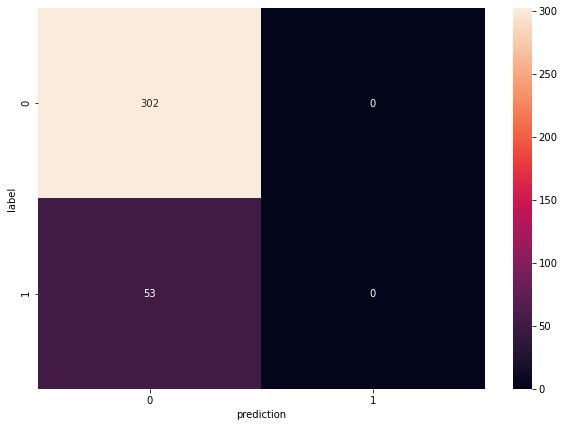

In [665]:
cm=tf.math.confusion_matrix(labels=ytests,predictions=yar)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('label')

In [666]:
302/(53+302)

0.8507042253521127

In [667]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:


In [668]:
#applying SMOTE for imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# xs, y = oversample.fit_resample(xs, y)

In [694]:
xtrains,xtests,ytrains,ytests=train_test_split(xs,y,test_size=.2,random_state=5)

In [695]:
xtrains = np.array(xtrains).reshape(xtrains.shape[0], xtrains.shape[1], 1)
xtests = np.array(xtests).reshape(xtests.shape[0], xtests.shape[1], 1)

In [725]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import LeakyReLU
cnn_model = tf.keras.models.Sequential()

cnn_model.add(Conv1D(filters=2, kernel_size=(3,),activation='relu', input_shape = (xtrains.shape[1],1)))
cnn_model.add(MaxPool1D(pool_size=(3,)))

cnn_model.add(Conv1D(filters=4, kernel_size=(3,), activation='relu'))
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))

# cnn_model.add(Flatten())

cnn_model.add(Dense(units = 16, activation='relu'))
cnn_model.add(Dense(units = 8, activation='relu'))
cnn_model.add(Dense(units = 1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
# cnn_model.summary()


In [728]:
cnn_model.fit(xtrains,ytrains,epochs=100,batch_size=8)

Epoch 1/100
119/119 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8656
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8656
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8656
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8656
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8656
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8656
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8656
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8656
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8656
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3938 - accura

Epoch 81/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8656
Epoch 82/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8656
Epoch 83/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8656
Epoch 84/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8656
Epoch 85/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8656
Epoch 86/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8656
Epoch 87/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8656
Epoch 88/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8656
Epoch 89/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8656
Epoch 90/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3914

In [729]:
cnn_model.evaluate(xtests,ytests)

8/8 [==============================] - 0s 6ms/step - loss: 0.4167 - accuracy: 0.8565


[0.41674235463142395, 0.8565400838851929]